## Домашнє завдання №5 - доопрацьований варіант
## Класифікування активності за даними акселерометра

#### 1. Отримання датасету

In [161]:
mypath = '.\data'

In [162]:
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd

In [163]:
# отримаємо список підкаталогів в теці "data"
activites = listdir(mypath)
activites

['idle', 'running', 'stairs', 'walking']

In [164]:
# Виведемо кількість файлів в кожній теці активності
for act in activites:
    path = join(mypath, act)  # створення шляху для активності
    frames = listdir(path)  # отримання списку файлів в 'path'
    print(act, ': ', len(frames))  # виведення кількості файлів в 'act'

idle :  1039
running :  3408
stairs :  165
walking :  1850


In [165]:
# Створюємо порожній массив numpy
data_array = np.array([])
# Створюємо порожній список для зберігання даних з файлів
data_list = []

In [166]:
# Створюємо датасет зі всіма даними, додавши відповідні цифпові мітки (label)
for act in activites:
    if act == 'idle':
        label = 0
    elif act == 'running':
        label = 1
    elif act == 'stairs':
        label = 2
    elif act == 'walking':
        label = 3
    file_path = join(mypath, act)
    list_of_files = listdir(file_path)  # список всіх файлів в папці
    
    for file in list_of_files:
        file_address = join(file_path, file)  # відносний шлях до файлу
        data = pd.read_csv(file_address)  # зчитування файлу
        
        data['class_number'] = label  # додавання відповідної мітки
        
        data_list.append(data) 

concat_data = pd.concat(data_list, ignore_index=True)  # об'єднання даних списка в один DataFrame 

df = concat_data.to_numpy()  # перетворення DataFrame в массив Numpy

[[ 1.000776  4.616021  8.576031  0.      ]
 [ 0.718261  4.209007  8.446744  0.      ]
 [-0.909797 -0.282516  9.203311  0.      ]
 ...
 [ 3.289633 -9.993398 -0.383072  3.      ]
 [-2.978387 -3.050213  1.273715  3.      ]
 [-4.34787  -9.92636  -1.642422  3.      ]]


(193860, 4)

In [167]:
# Запишемо отримані дані у файл в бінарному форматі
import pickle

with open('df.pickle', 'wb') as f:
    pickle.dump(df, f)

In [168]:
# Ф-я завантаження датасету.
def open_data_set():
    
    with open('df.pickle', 'rb') as f:
        df_work = pickle.load(f)

    return df_work

In [169]:
# Перевіримо, що завантажений датасет дорівнює оригіналу
# Завантажимо датасет
df_work = open_data_set()
# Перевірка коректності роботи завантажувача pickle
np.array_equal(df, df_work)  # перевірка однаковості, повинно бути "True"

True

#### 2. Аналіз датасету (Exploratory Data Analysis)

In [177]:
# Розмір датасету
df_work.shape

(193860, 4)

In [192]:
# Перевіримо датасет на наявність пропусків
has_missing_values = np.isnan(df_work).any()  # False - пропусків нема
has_missing_values

False

In [173]:
# Виведемо перші 5 строк нашого датасету для розуміння його структури
print(df_work[:5])

[[ 1.000776  4.616021  8.576031  0.      ]
 [ 0.718261  4.209007  8.446744  0.      ]
 [-0.909797 -0.282516  9.203311  0.      ]
 [ 5.09965   0.148441  8.418014  0.      ]
 [ 1.762132 -0.162806  9.251195  0.      ]]


In [175]:
# Виведемо основні статистичні показники датасету
print("Mean:", np.mean(df_work))
print("Std:", np.std(df_work))
print("Min:", np.min(df_work))
print("25%:", np.percentile(df_work, 25))
print("50%:", np.percentile(df_work, 50))
print("75%:", np.percentile(df_work, 75))
print("Max:", np.max(df_work)) 

Mean: 1.691028609785412
Std: 8.355256394317728
Min: -39.188293
25%: -1.853112
50%: 1.0
75%: 4.381389
Max: 39.188293


In [184]:
# Виведемо розподілення даних по класам
class_distribution = np.unique(df_work[:, -1], return_counts=True)
print(dict(zip(class_distribution[0], class_distribution[1])))

{0.0: 31170, 1.0: 102240, 2.0: 4950, 3.0: 55500}


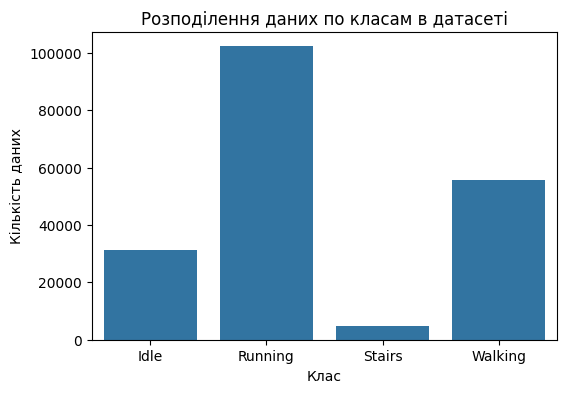

In [185]:
# Візуалізуємо розподілення даних по класам
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['Idle', 'Running', 'Stairs', 'Walking']

plt.figure(figsize=(6, 4))
sns.barplot(x=class_labels, y=class_distribution[1])
plt.title("Розподілення даних по класам в датасеті")
plt.xlabel("Клас")
plt.ylabel("Кількість даних")
plt.show()

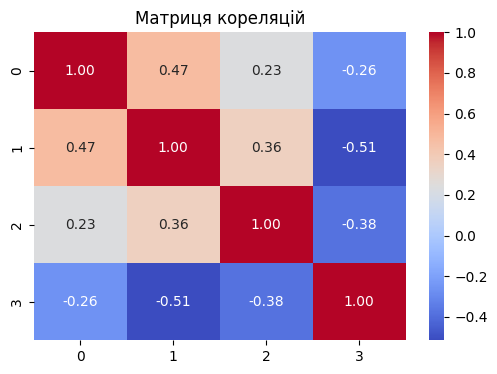

In [189]:
# Візуалізуємо кореляцію даних
correlation_matrix = np.corrcoef(df_work, rowvar=False)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матриця кореляцій")
plt.show()